In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
# b = 2, a =-4
a = -4.
b = 2.

## Задание 1)
Критерий Пирсона

Формируем выборку из 200 случайных чисел

In [3]:
n = 200
X = []
Y = []
# Формируем однородную непрерывную случайную величину.
random_variable = sts.uniform()
# Генерируем случайные числа
xi = random_variable.rvs(size=n)
# X_i = e_i(b - a) + a
for i in range(n):
    x = xi[i] * (b - a) + a
    X.append(x)
    if x < 0:
        y = - (abs(x))**(1/3)
    else:
        y = x**(1/3)
    Y.append(y)

In [4]:
print(Y)

[-1.4541109968924626, -1.2745618275799373, -1.512993715981195, 0.7744136210404353, -1.2397981036637598, -0.8490933902631341, 0.9234454066040195, 1.1737192219045285, 0.5546349957150872, -1.459086716147179, -1.2309836291374292, -0.8297266344312328, 1.117805154778001, -1.1220012835444337, 1.2548375811225365, -0.9551305395946716, 1.0202162930952805, -1.0478401459080418, -0.9881204574705251, -0.6303352894679028, -1.5854207371907698, -1.299213719625113, -1.3825140718702345, 1.1239324931443953, 1.0258044229884047, 1.1212259819805892, 1.225997128779465, 0.2805438050590605, -0.9911337031099675, 0.6675063211649749, -1.4085405175928165, -0.4704351556836688, -1.4354182512950568, 0.8835168240433346, 0.9868905883814831, -0.27083137724220047, 1.0944379648724119, -1.533105856212092, -1.3898824387847166, -1.5021977023927269, -1.3260898315848852, -1.0103459023244519, -1.0724342359037118, 0.6486673094754976, -1.5016809062268572, 1.2593119922978422, -0.7922238263490989, -1.2514039515761448, -1.36220078187

Cтроим гистограмму равновероятностным способом:

In [5]:
#определяем колво интервалов
if n <= 100:
    M = int(np.sqrt(n))
else:
    M = int(4 * np.log10(n))

In [6]:
m = n // M
def equal_probability(sample):
    sample.sort()
    A = np.zeros(M)
    B = np.zeros(M)
    
    A[0] = sample[0]
    B[-1] = sample[-1]
    for i in range(1, M):
        A[i] = (sample[m * i] + sample[m * i + 1]) / 2
        B[i - 1] = A[i]
    delta = []
    for i in range(len(A)):
        delta.append(B[i] - A[i])
    f_x = []
    x = []
    s = A[0]
 
    for i in delta:
        f_x.append(1. /(M * i))
        x.append(s)
        s += i
        
    return (x, f_x, A, B, delta)

In [7]:
x, f_x, A, B, delta = equal_probability(Y)
table = pd.DataFrame(data={ "$x_i$": x, "$A_i$" : A, "$B_i$": B, "$delta_i$": delta, "$v_i$": [m]*len(x), "$f_i$": f_x})
table

,$x_i$,$A_i$,$B_i$,$delta_i$,$v_i$,$f_i$
0,-1.585421,-1.585421,-1.469845,0.115575,22,0.961373
1,-1.469845,-1.469845,-1.352289,0.117556,22,0.945175
2,-1.352289,-1.352289,-1.162933,0.189356,22,0.586783
3,-1.162933,-1.162933,-0.991666,0.171267,22,0.648759
4,-0.991666,-0.991666,-0.741369,0.250297,22,0.443917
5,-0.741369,-0.741369,0.374716,1.116085,22,0.099554
6,0.374716,0.374716,0.819670,0.444954,22,0.249714
7,0.819670,0.819670,1.106122,0.286451,22,0.387888
8,1.106122,1.106122,1.259312,0.153190,22,0.725314


Находим теоретическую плотность распределения:

In [8]:
x_teor = np.linspace(-(4)**(1/3), 2**(1/3), 100)
f_y = []
for xi in x_teor:
    f_y.append(1/2*xi**2) # теоретическая плотность распределения

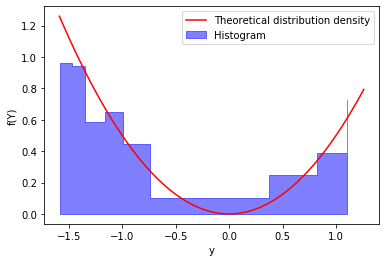

In [9]:
plt.fill_between(x, y1=f_x, y2=[0]*len(f_x), color='b', step='post', alpha=0.5, label="Histogram")
plt.plot(x_teor, f_y, label='Theoretical distribution density', c='r')
plt.legend()
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

Выдвинем гипотезу H0, что наши эмпирическое и теоретическое распределения совпадают.


Рассчитаем теоретическую вероятность попадания случайной величины в $i$-й интервал при условии, что гипотеза верна

$$p_i=F(B_i)-F(A_i) = \big(\frac{1}{6}((B_i)^3+4)-\frac{1}{6}((A_i)^3+4)\big)=\frac{1}{6}((B_i)^3-(A_i)^3)$$

In [10]:
p_teor = []
pi = [m / n] * M
F_in_B = []
F_in_A = []
for i in range(len(A)):
    F_Ai = 1./6. * ((A[i])**3+4)
    F_Bi = 1./6. * ((B[i])**3+4)
    F_in_A.append(F_Ai)
    F_in_B.append(F_Bi)
    p_teor.append(F_Bi - F_Ai)

Найдем значение критерия $\chi^2$:

In [11]:
xi = []
for i in range(M):
    xi.append(n * (p_teor[i] - pi[i])**2 / p_teor[i])
print("xi = " , sum(xi))

xi =  9.368128496992385


In [12]:
table2 = pd.DataFrame(data={"$F(A_i)$" : F_in_A, "$F(B_i)$": F_in_B, "$p_i$": p_teor, "$p_i^*$": pi, "$\chi_i$": xi})
table2

,$F(A_i)$,$F(B_i)$,$p_i$,$p_i^*$,$\chi_i$
0,0.002492,0.137413,0.134921,0.11,0.920645
1,0.137413,0.254515,0.117101,0.11,0.086130
2,0.254515,0.404539,0.150024,0.11,2.135598
3,0.404539,0.504132,0.099593,0.11,0.217481
4,0.504132,0.598754,0.094621,0.11,0.499891
5,0.598754,0.675436,0.076682,0.11,2.895320
6,0.675436,0.758450,0.083015,0.11,1.754406
7,0.758450,0.892224,0.133774,0.11,0.844994
8,0.892224,0.999517,0.107293,0.11,0.013663


In [13]:
k = M - 1
print("k = " , k)

k =  8


$\chi_{0.01, 8}=20.10$ , $\chi_{0.99, 8}=1.646$

Так как $\chi_{0.01, 8}$ < $\chi$ < $\chi_{0.99, 8}$, то нет оснований отвергать гипотезу $H_0$

##  Задание 2) 
критерий Колмогорова

In [14]:
n = 30
X = []
Y = []
# Формируем однородную непрерывную случайную величину.
random_variable = sts.uniform()
# Генерируем случайные числа
xi = random_variable.rvs(size=n)
# X_i = e_i(b - a) + a
for i in range(n):
    x = xi[i] * (b - a) + a
    X.append(x)
    if x < 0:
        y = - (abs(x))**(1/3)
    else:
        y = x**(1/3)
    Y.append(y)
    
Y.sort()

Строим вариационный ряд:

In [15]:
variational_series = pd.DataFrame(data={"$Y_i$": Y})
variational_series.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
$Y_i$,-1.583149,-1.540942,-1.540083,-1.536858,-1.521174,-1.503514,-1.477221,-1.366479,-1.321975,-1.307866,...,-0.486996,0.362124,0.819065,0.953083,0.958905,0.999809,1.069115,1.113877,1.220911,1.224812


Графики теоретической и эмпирической функций распределения

[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.        ]


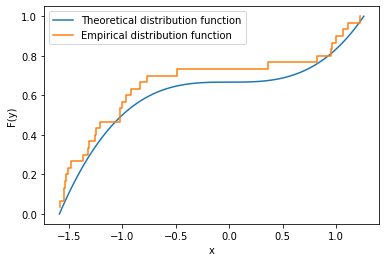

In [17]:
emp_dist_func = ECDF(Y)
print(emp_dist_func.y)
x_teor = np.linspace(-(4)**(1/3), 2**(1/3), 100)
y_teor = (x_teor**3 + 4) / 6 # теоретическая функция распределения
plt.plot(x_teor, y_teor, label='Theoretical distribution function')
plt.step(emp_dist_func.x, emp_dist_func.y, label='Empirical distribution function')
plt.ylabel('F(y)')
plt.xlabel('x')
plt.legend()

Определим максимальное по модулю отклонение между функциями:

In [18]:
d_plus = []
d_minus = []
for i in range(n - 1):
    d_plus.append(abs((i + 1) / n - ((Y[i])**3 + 4) / 6))
    d_minus.append(abs(i / n - ((Y[i])**3 + 4) / 6))
    
d = max(max(d_plus), max(d_minus))
print("d = ", d)

d =  0.10392772137909015


Вычислим значение критерия:

In [19]:
lambd = d * np.sqrt(n)
print("lambda = ", lambd)

lambda =  0.5692355734943959


Из таблицы вероятностей Колмогорова выбираем критическое значение $\lambda_y$:

$\gamma = 1-\alpha = 0.95$

$\lambda_\gamma$ = 1.38

 Так как 0 < $\lambda$ < $\lambda_\gamma$, то гипотеза $H_0$ подтверждена

##  Задание 3) 
критерий Мизеса

In [20]:
n = 50
X = []
Y = []
# Формируем однородную непрерывную случайную величину.
random_variable = sts.uniform()
# Генерируем случайные числа
xi = random_variable.rvs(size=n)
# X_i = e_i(b - a) + a
for i in range(n):
    x = xi[i] * (b - a) + a
    X.append(x)
    if x < 0:
        y = - (abs(x))**(1/3)
    else:
        y = x**(1/3)
    Y.append(y)
    
Y.sort()

Найдем значения эмпирической функции распределения, теоретической функции распределения, значения квадрата отклонения:

In [21]:
Fn = []
F = []
squared_deviation = []

for i in range(1,n+1):
    Fn.append((i - 0.5) / n)
    F.append(((Y[i-1])**3+4)/6.)
    squared_deviation.append((Fn[i-1] - F[i-1])**2)

table = pd.DataFrame(data={"$y_i$": Y, "$F_n$": Fn, "$F$": F, "$\delta$": squared_deviation})
table

,$y_i$,$F_n$,$F$,$\delta$
0,-1.549425,0.01,0.046712,0.001348
1,-1.541587,0.03,0.056072,0.000680
2,-1.527998,0.05,0.072078,0.000487
3,-1.515862,0.07,0.086133,0.000260
4,-1.504869,0.09,0.098671,0.000075
5,-1.499040,0.11,0.105246,0.000023
6,-1.498739,0.13,0.105584,0.000596
7,-1.496837,0.15,0.107717,0.001788
8,-1.484811,0.17,0.121081,0.002393
9,-1.464539,0.19,0.143125,0.002197


Фактическое значение статистики:

In [22]:
print(1. / (12 * n) + sum(squared_deviation))

0.08602492494960587


Критическое значение статистики Мизеса на уровне значимости $\alpha=0.05$ по таблице равно $n\sigma^2_{\alpha}=0.461$.

Получили, что фактическое значение меньше критического. Значит, гипотеза не противоречит имеющимся данным